In [4]:
conda install -c conda-forge pyedflib

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pyedflib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pyedflib-0.1.37            |  py311h0034819_3         1.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  pyedflib           conda-forge/osx-64::pyedflib-0.1.37-py311h0034819_3 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [79]:
import pyedflib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [80]:
import mne

# Reading edf data:
data = mne.io.read_raw_edf('AG9.edf')
raw_data = data.get_data()
info = data.info
channels = data.ch_names
Fd = info['sfreq'] # Частота дискретизации
df = pd.DataFrame(data=raw_data.T,    
            index=range(raw_data.shape[1]),  
            columns=channels) 

# Создание массива времени    
Td = 1/Fd

Extracting EDF parameters from /Users/moomintroll/AG9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [81]:
info

Measurement date,"February 01, 2017 13:26:42 GMT"
Experimenter,Unknown
Participant,AG9
Digitized points,Not available
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [82]:
df

,ECG I,ECG II,ECG V1,ECG V2,ECG V3,ECG V4,ECG V5,ECG V6
0,-0.000175,-0.000171,0.000029,-0.000180,-0.001222,-0.000337,-0.000940,-0.002063
1,-0.000175,-0.000172,0.000029,-0.000184,-0.001225,-0.000339,-0.000944,-0.002093
2,-0.000173,-0.000173,0.000028,-0.000188,-0.001229,-0.000341,-0.000946,-0.002116
3,-0.000173,-0.000173,0.000027,-0.000191,-0.001231,-0.000344,-0.000947,-0.002136
4,-0.000173,-0.000175,0.000027,-0.000192,-0.001232,-0.000345,-0.000948,-0.002137
...,...,...,...,...,...,...,...,...
4995,0.000005,-0.000583,0.000346,-0.000044,-0.000608,-0.000093,-0.000593,-0.000850
4996,0.000008,-0.000579,0.000347,-0.000044,-0.000611,-0.000093,-0.000590,-0.000835
4997,0.000011,-0.000577,0.000346,-0.000042,-0.000612,-0.000091,-0.000587,-0.000812
4998,0.000012,-0.000578,0.000348,-0.000037,-0.000610,-0.000089,-0.000581,-0.000782


In [83]:
d1 = np.array(df['ECG I'])
t = []
for i in range(d1.shape[0]):
    t.append(Td*i)
t = np.array(t)

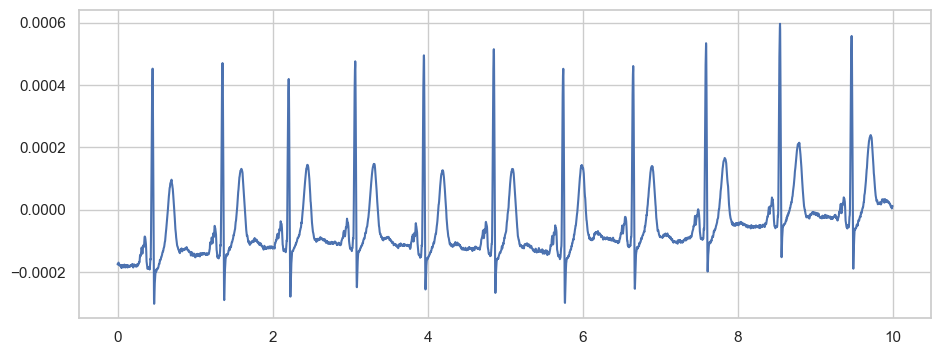

In [84]:
plt.plot(t,d1)

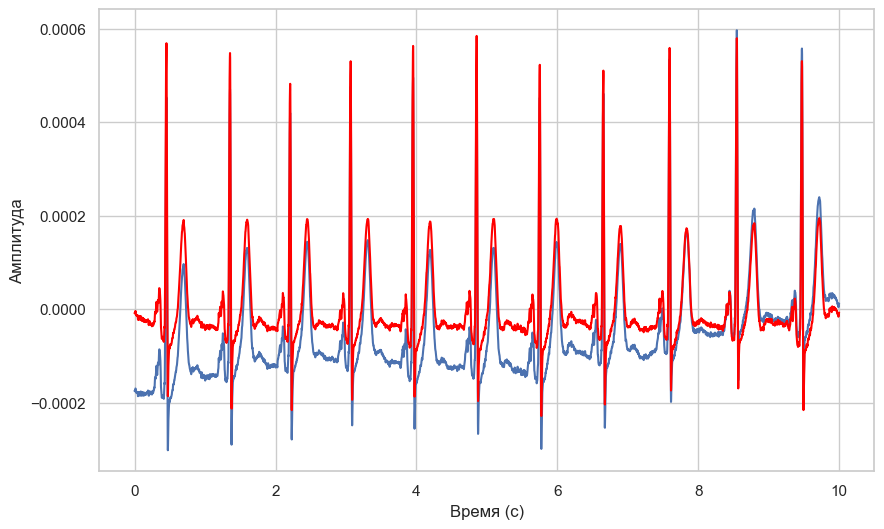

In [57]:
import scipy.signal as signal

# Parameters
fs = 500  
cutoff_freq = 0.6 
order = 1  

# Butterworth filter
nyquist_freq = 0.5 * fs  # Частота Найквиста 
normalized_cutoff = cutoff_freq / nyquist_freq  # Нормализованная частота среза

# Getting filter coefficients (b - numerator, a - denominator of transfer function)
b, a = signal.butter(order, normalized_cutoff, btype='high', analog=False)

# Applying the filter
filtered_d1 = signal.filtfilt(b, a, d1)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(t, d1, label='Исходный сигнал d1')
plt.plot(t, filtered_d1, label='Отфильтрованный сигнал d1', color='red')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()


In [58]:
d2 = np.array(df['ECG II'])
v1 = np.array(df['ECG V1'])
v2 = np.array(df['ECG V2'])
v3 = np.array(df['ECG V3'])
v4 = np.array(df['ECG V4'])
v5 = np.array(df['ECG V5'])
v6 = np.array(df['ECG V6'])

In [59]:
filtered_d2 = signal.filtfilt(b, a, d2)
filtered_v1 = signal.filtfilt(b, a, v1)
filtered_v2 = signal.filtfilt(b, a, v2)
filtered_v3 = signal.filtfilt(b, a, v3)
filtered_v4 = signal.filtfilt(b, a, v4)
filtered_v5 = signal.filtfilt(b, a, v5)
filtered_v6 = signal.filtfilt(b, a, v6)

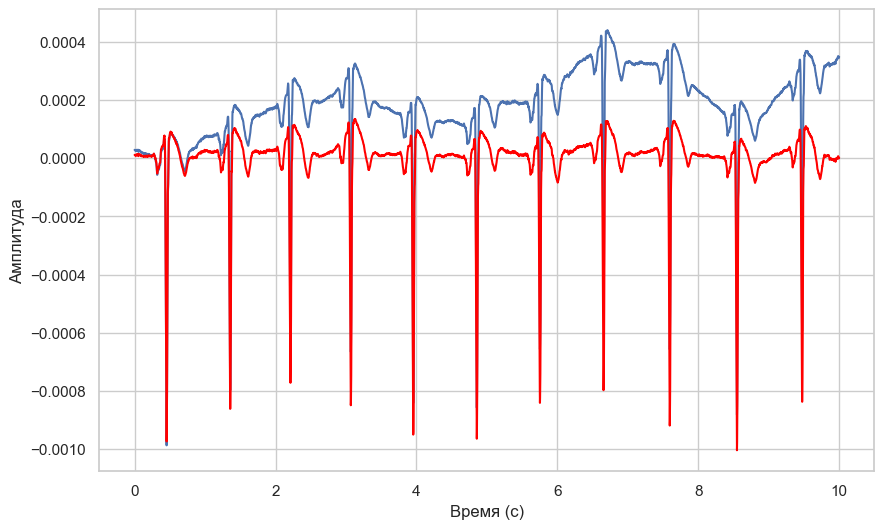

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(t, v1, label='Исходный сигнал v1')
plt.plot(t, filtered_v1, label='Отфильтрованный сигнал v1', color='red')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.show()

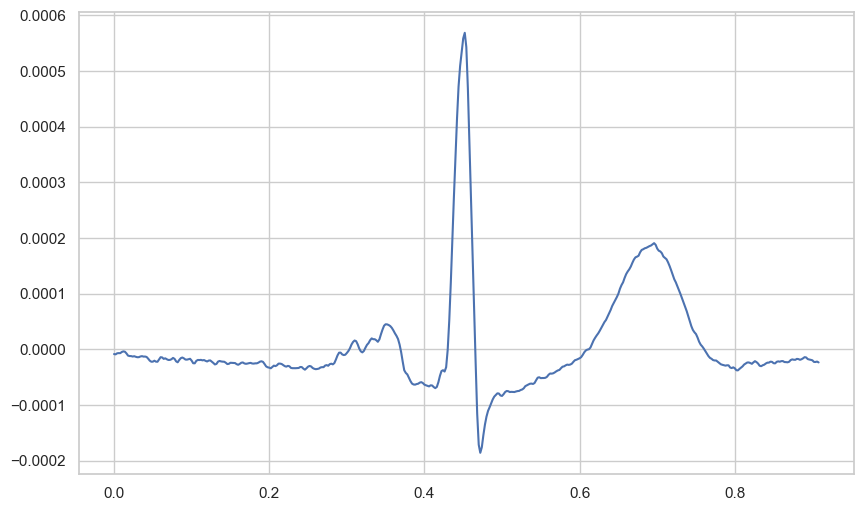

In [70]:
# Searching for 1 period
plt.figure(figsize=(10, 6))
plt.plot(t[0:int(np.round((d1.shape[0])/11))], filtered_d1[0:455])
plt.show()

In [71]:
sig = np.column_stack((filtered_d1, filtered_d2, filtered_v1, filtered_v2, filtered_v3, filtered_v4, filtered_v5, filtered_v6))

In [72]:
sig.shape

(5000, 8)

In [73]:
# Cutting the array to get 1 period
sig = sig[:455, :]
sig.shape

(455, 8)

In [74]:
# Computation of VECG
x = np.zeros((sig.shape[0], 1))
y = np.zeros((sig.shape[0], 1))
z = np.zeros((sig.shape[0], 1))
for i in range (sig.shape[0]):
    x[i] = 0.172*sig[i,2] + 0.074*sig[i,3] - 0.122*sig[i,4] - 0.231*sig[i,5] - 0.239*sig[i,6] - 0.194*sig[i,7] \
    - 0.156*sig[i,0] + 0.01*sig[i,1]
    y[i] = 0.057*sig[i,2] - 0.019*sig[i,3] - 0.106*sig[i,4] - 0.022*sig[i,5] + 0.041*sig[i,6] + 0.048*sig[i,7] \
    - 0.227*sig[i,0] + 0.887*sig[i,1]
    z[i] = 0.229*sig[i,2] + 0.31*sig[i,3] + 0.246*sig[i,4] + 0.063*sig[i,5] - 0.055*sig[i,6] - 0.108*sig[i,7] \
    - 0.022*sig[i,0] - 0.102*sig[i,1]

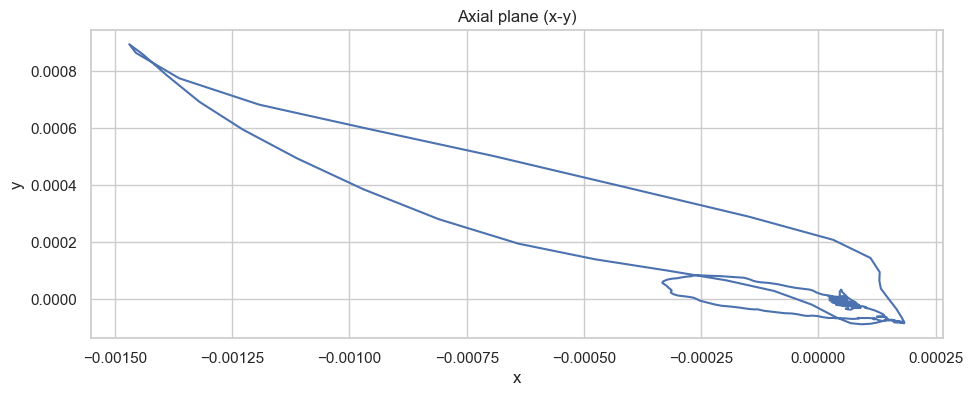

In [75]:
plt.plot(x, y)
plt.title('Axial plane (x-y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

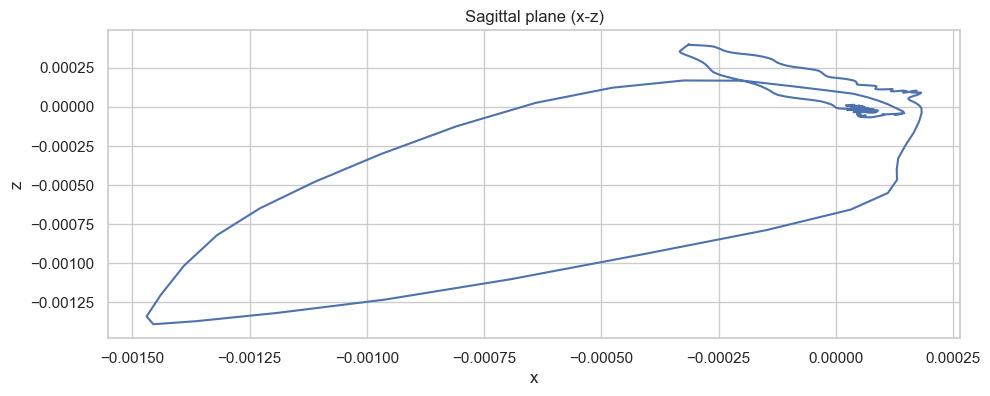

In [76]:
plt.plot(x, z)
plt.title('Sagittal plane (x-z)')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

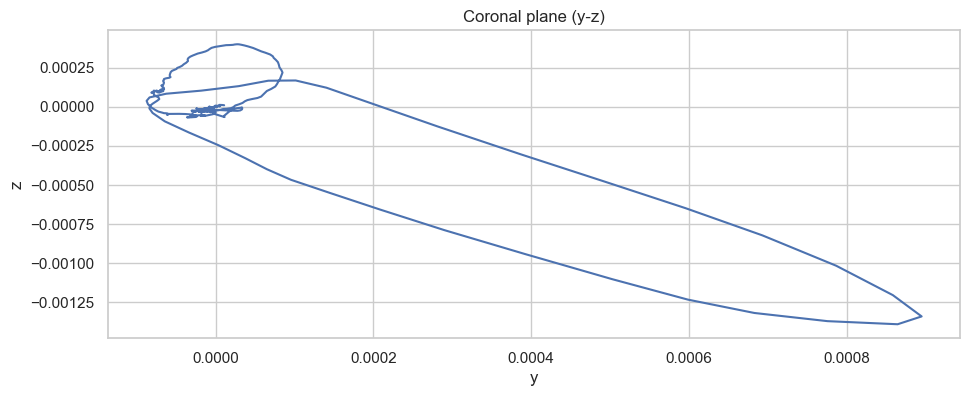

In [77]:
plt.plot(y, z)
plt.title('Coronal plane (y-z)')
plt.xlabel('y')
plt.ylabel('z')
plt.show()

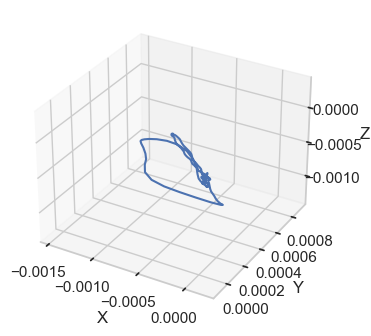

In [78]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.ion() 
plt.show()
plt.pause(60)
plt.close()

In [24]:
import matplotlib
matplotlib.use('Qt5Agg') 
import matplotlib.pyplot as plt

In [21]:
pip install PyQt5

Note: you may need to restart the kernel to use updated packages.
